In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv('/content/NetflixOriginals.csv',encoding='ISO-8859-1')

## Tip dönüşümü ##

df['Runtime'] = df['Runtime'].astype(int)
df["Premiere"] = pd.to_datetime(df.Premiere)
df['Year'] = pd.DatetimeIndex(df.Premiere).year.astype(int)

df.shape

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Year        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.1+ KB


In [14]:

df.columns= df.columns.str.lower()
df.head()

,title,genre,premiere,runtime,imdb score,language,year
0,Enter the Anime,Documentary,2019-08-05,58,2.500,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.600,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.600,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.200,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.400,Hindi,2020


                      language  runtime
0                 English/Akan  136.000
1         Khmer/English/French  136.000
2                      Marathi  121.667
3               English/Korean  121.000
4              Spanish/Catalan  116.000
5                       Korean  115.833
6                        Hindi  115.788
7               English/Arabic  114.000
8                   Indonesian  103.778
9                      Turkish  101.800
10                       Malay  101.000
11                       Tamil  101.000
12                        Thai  101.000
13                       Dutch   99.667
14                      German   99.600
15                    Filipino   99.500
16                    Japanese   99.333
17                      Polish   98.667
18                     Italian   98.357
19             Spanish/English   96.000
20                     Spanish   93.387
21                      French   92.700
22                     English   91.818
23                  Portuguese   91.250


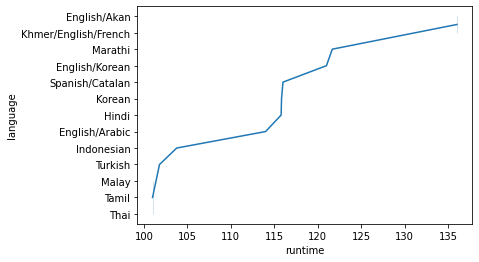

In [16]:
# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

df.groupby("language").agg({"runtime": "mean"}).sort_values(by="runtime", ascending=False)
df.groupby("language").agg({"runtime": "mean"}).sort_values(by="runtime", ascending=False)[0:1]
df1 = df.groupby("language").agg({"runtime": "mean"}).sort_values(by="runtime", ascending=False).reset_index()
print(df1)

sns.lineplot(y=df1["language"], x=df1.loc[(df1["runtime"] >= 100)]["runtime"])
plt.show()

In [ ]:
# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.


In [37]:
df2 = df.loc[(df["genre"] == "Documentary") & (df["premiere"] > "2019-01-31") & (df["premiere"] < "2020-06-01")].head()





In [41]:
fig = px.bar(df2, x=df2["title"], y=df2["imdb score"],labels = {"title":"Genre:Documentary"})

fig.show()

In [48]:
# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
df.loc[(df["language"] == "English")]
df3 = df.loc[(df["language"] == "English")].sort_values(by="imdb score", ascending=False)[0:1]
df3


,title,genre,premiere,runtime,imdb score,language,year
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.000,English,2020


In [44]:
# 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
df[df['language'].str.contains('Hindi')]['runtime'].mean()

111.02857142857142

In [67]:
# 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
df4 = df["genre"].value_counts().head(20)
print(df4)
fig = px.bar(df4, x=df4.index, y=df4.values, labels={"y":"Number of Movies", "index":"Genres"})

fig.show()



Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Name: genre, dtype: int64


In [68]:
# Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
df['language'].value_counts()[:3]

English    401
Hindi       33
Spanish     31
Name: language, dtype: int64

In [70]:
# IMDB puanı en yüksek olan ilk 10 film hangileridir?
df5= df.sort_values('imdb score',ascending=False).head(10)
fig = px.scatter(df5, y= 'title', x='imdb score', color='genre', 
                 title = "Top 10 Films")

fig.show()

            imdb score  runtime
imdb score       1.000   -0.041
runtime         -0.041    1.000


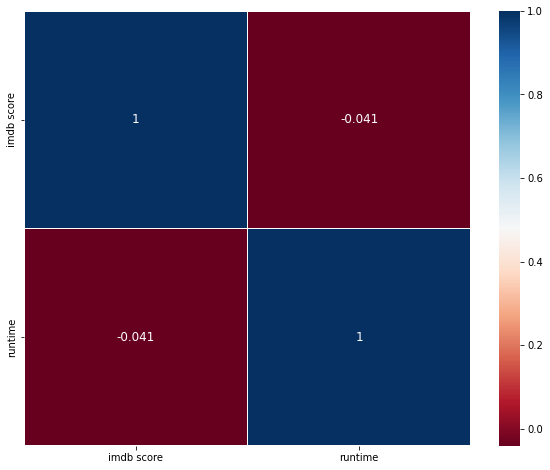

No correlation,Correlation score is too low!!


In [77]:
#IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)

print(df[["imdb score", "runtime"]].corr())
correlation_matrix(df,["imdb score","runtime"])
print("No correlation,Correlation score is too low!!")

                                  genre  imdb score
0                           Documentary       9.000
1                          One-man show       8.500
2                          Concert Film       8.400
3  Animation/Christmas/Comedy/Adventure       8.200
4                                 Drama       7.900
5                     Animation / Short       7.800
6                           Crime drama       7.800
7                       Musical / Short       7.700
8                             Making-of       7.700
9                             War drama       7.700


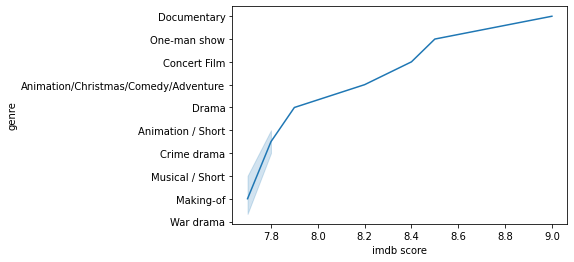

In [78]:
# IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

df.groupby("genre").agg({"imdb score": "max"}).sort_values(by="imdb score", ascending=False)[0:10]
df6 = df.groupby("genre").agg({"imdb score": "max"}).sort_values(by="imdb score", ascending=False)[
                0:10].reset_index()

print (df6)
sns.lineplot(y=df6["genre"], x=df6["imdb score"])
plt.show()

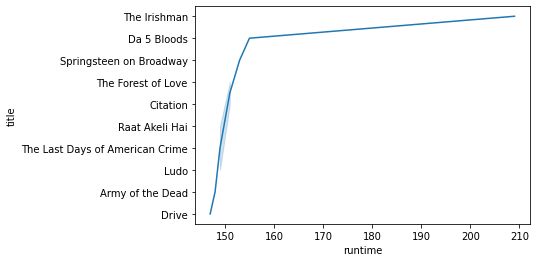

In [79]:
# 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

df.groupby("title").agg({"runtime": "max"}).sort_values(by="runtime", ascending=False)[0:10]

df7 = df.groupby("title").agg({"runtime": "max"}).sort_values(by="runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=df7["title"], x=df7["runtime"])
plt.show()

In [81]:
# Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
df['year'].value_counts()
year = df['year'].value_counts()

fig = px.bar(df, x=year.index, y=year.values, labels={"y":"Counts of Films", "x":"Year"})

fig.show()

In [84]:
# Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

df.groupby("language").agg({"imdb score": "mean"}).sort_values(by="imdb score", ascending=True)[0:1]

df.groupby("language").agg({"imdb score": "mean"}).sort_values(by="imdb score", ascending=True)
df8 = df.groupby("language")["imdb score"].mean().nsmallest(10)

fig = px.bar(df8, x=df8.index, y=df8.values, 
             labels={'y':'Rating Score', 'x':'language'})

fig.show()

In [85]:
# Hangi yılın toplam "runtime" süresi en fazladır?
df.groupby("year").agg({"runtime": "sum"}).sort_values(by="runtime", ascending=False)[0:1]

,runtime
year,
2020,17384


In [86]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
df.groupby(["language"])["genre"].value_counts().groupby(level=0).head(1)

language                    genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [87]:
#Veri setinde outlier veri var mıdır? Açıklayınız.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
     # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))


premiere False
runtime False
imdb score False
year False
